In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
# python 버전을 꼭 확인
model = keras.models.load_model('cnn_model.keras')

In [3]:
model.layers

[<Conv2D name=conv2d_10, built=True>,
 <MaxPooling2D name=max_pooling2d_10, built=True>,
 <Conv2D name=conv2d_11, built=True>,
 <MaxPooling2D name=max_pooling2d_11, built=True>,
 <Flatten name=flatten_7, built=True>,
 <Dense name=dense_8, built=True>,
 <Dropout name=dropout_6, built=True>,
 <Dense name=dense_9, built=True>]

In [4]:
conv = model.layers[0]

In [5]:
# 필터 (3,3,1,32), 절편 각 1개씩 총 32개
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [6]:
# numpy타입으로 변경
conv_weights = conv.weights[0].numpy()

In [7]:
# 평균, 표준편차
print(conv_weights.mean(), conv_weights.std())

-0.048027284 0.29626077


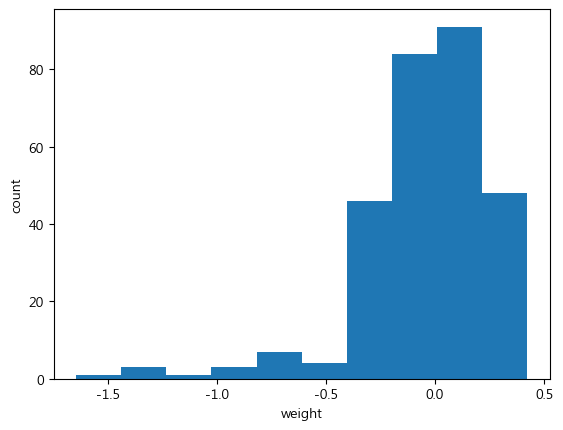

In [8]:
# 1차원 행렬로 변경
# 각각의 값을 히스토그램에 출력
# 0에 근접할 수록 의미가 없고, 다른 값들은 의미가 존재

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

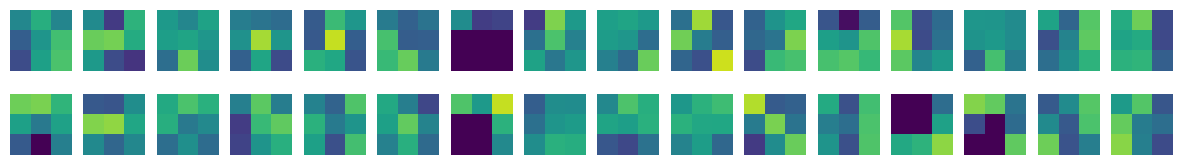

In [9]:
# 3x3x1 사이즈 32개 이미지를 출력
# 이미지 출력 2행 16열 형태로 32개 그래프 출력
# vmin=-0.5, vamx=0.5 이미지마다 밝기가 다르기 때문에 이것을 기준점으로 통일
fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [10]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',\
    input_shape=(28,28,1)))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [12]:
no_training_weights = no_training_conv.weights[0].numpy()

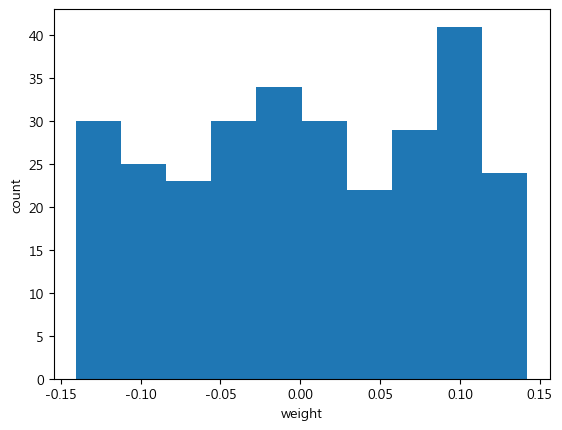

In [14]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

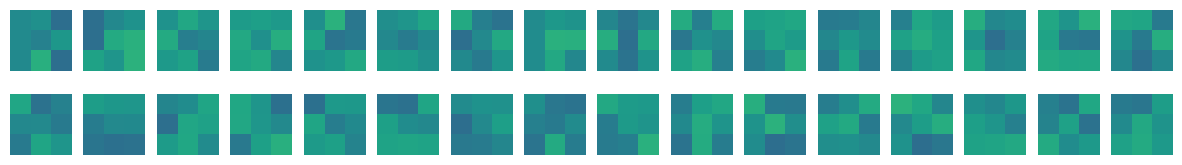

In [15]:
# 3x3x1 사이즈 32개 이미지를 출력
# 이미지 출력 2행 16열 형태로 32개 그래프 출력
# vmin=-0.5, vamx=0.5 이미지마다 밝기가 다르기 때문에 이것을 기준점으로 통일
fig,axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()